Homework #3 for Data Science Bootcamp Session 2 |
Rami Gorovoi-Abu Hashish

https://data.cityofnewyork.us/Transportation/Brooklyn-Bridge-Automated-Pedestrian-Counts-Demons/6fi9-q3ta/about_data

/tmp/ipython-input-4248006495.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Counts by Weekday')

Text(0.5, 0, 'Day of Week')

Text(0, 0.5, 'Pedestrian Count')

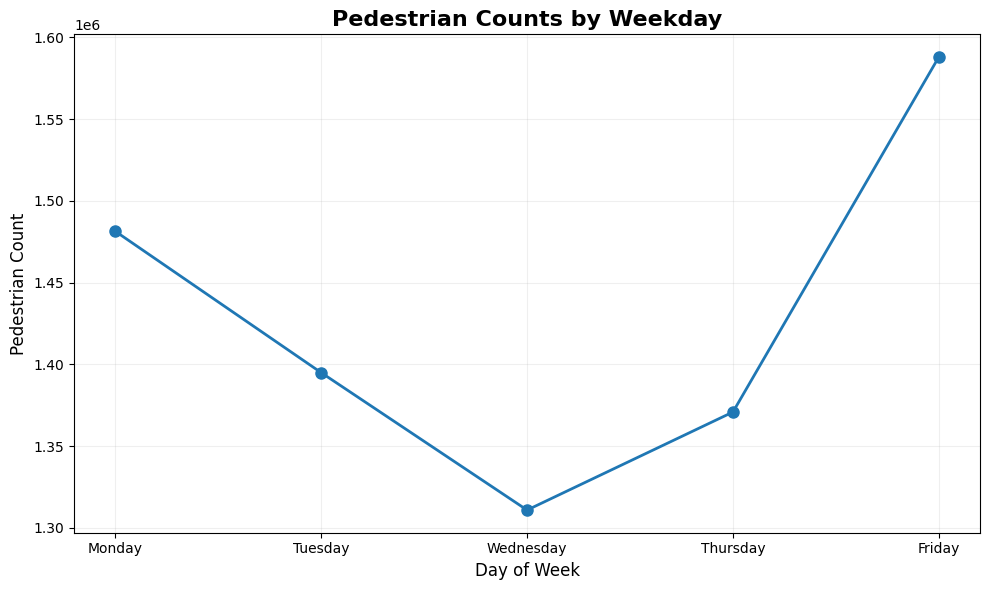

day_of_week
Monday       1481435
Tuesday      1394963
Wednesday    1310900
Thursday     1370880
Friday       1588068
Name: Pedestrians, dtype: int64


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url,sep=',')

# 1. Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['date'] = df['hour_beginning'].dt.date
df['day_of_week'] = df['hour_beginning'].dt.day_name()
df['hour'] = df['hour_beginning'].dt.hour
df['year'] = df['hour_beginning'].dt.year

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['day_of_week'].isin(weekdays)].copy()

weekday_counts = df_weekdays.groupby('day_of_week')['Pedestrians'].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_counts = weekday_counts.reindex(weekday_order)

# Line graph
plt.figure(figsize=(10, 6))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linewidth=2, markersize=8)
plt.title('Pedestrian Counts by Weekday', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Pedestrian Count', fontsize=12)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

print(weekday_counts)

Pedestrian counts per weather condition (2019):
                       Total  Average  Hours
weather_summary                             
partly-cloudy-day    2790868   1574.0   1773
clear-day            1953025   1382.0   1413
cloudy                984867    543.0   1813
rain                  139502    230.0    607
partly-cloudy-night    63794     53.0   1209
clear-night            61815     33.0   1860
snow                    8460    223.0     38
fog                     4673    212.0     22
wind                    2716    679.0      4
sleet                   1426    178.0      8


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix: Pedestrian Counts and Weather in 2019')

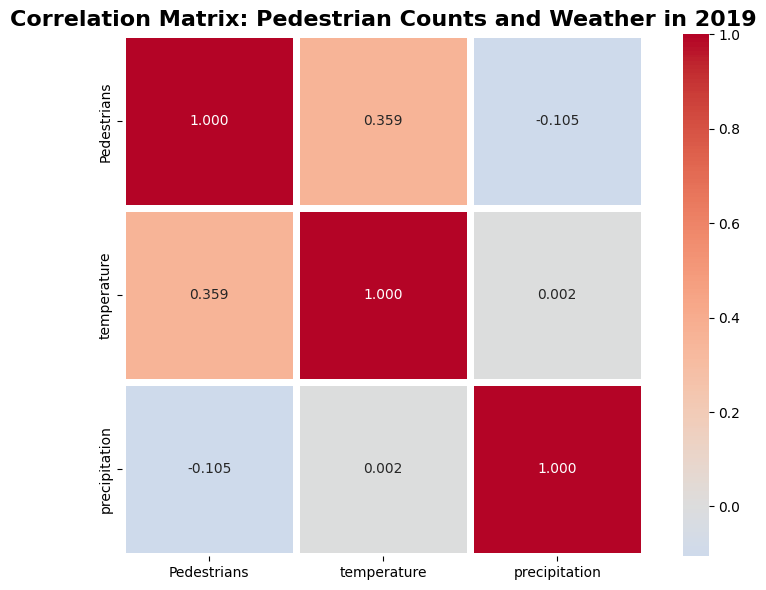


Correlation Matrix:
               Pedestrians  temperature  precipitation
Pedestrians       1.000000     0.358757      -0.105432
temperature       0.358757     1.000000       0.001911
precipitation    -0.105432     0.001911       1.000000


In [30]:
# 2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year.
# Sort the pedestrian count data by weather summary to identify any correlations (with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

df_2019 = df[df['year'] == 2019].copy()

# Grouping pedestrian count by weather
weather_analysis = df_2019.groupby('weather_summary').agg({ 'Pedestrians': ['sum', 'mean', 'count']}).round(0)
weather_analysis.columns = ['Total', 'Average', 'Hours']
weather_analysis = weather_analysis.sort_values('Total', ascending=False)

print("Pedestrian counts per weather condition (2019):")
print(weather_analysis)

# Correlation matrix
numeric_cols = ['Pedestrians', 'temperature', 'precipitation']
available_cols = [col for col in numeric_cols if col in df_2019.columns]

if len(available_cols) > 1:
    corr_matrix = df_2019[available_cols].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=5, fmt='.3f')
    plt.title('Correlation Matrix: Pedestrian Counts and Weather in 2019', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\nCorrelation Matrix:")
print(corr_matrix)

Pedestrian activity by time of day:
               Total      Average  Hours
time_of_day                             
Morning      2480582   529.699338   4683
Afternoon    6803093  1694.841305   4014
Evening      1596480   596.591928   2676
Night         152711    32.602690   4684


<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Average Pedestrian Count by Time of Day')

Text(0.5, 0, 'Time of Day')

Text(0, 0.5, 'Average Pedestrians per Hour')

([<matplotlib.patches.Wedge at 0x7926dcec8410>,
 [Text(-0.7139609824053907, 0.836815221899512, 'Morning'),
  Text(0.22743674831847657, -1.0762307027372515, 'Afternoon'),
  Text(0.567023721133938, 0.9425943452362857, 'Evening'),
  Text(0.047816139980670254, 1.0989602434835162, 'Night')],
 [Text(-0.3894332631302131, 0.45644466649064286, '22.5%'),
  Text(0.12405640817371447, -0.5870349287657735, '61.7%'),
  Text(0.309285666073057, 0.5141423701288831, '14.5%'),
  Text(0.02608153089854741, 0.5994328600819179, '1.4%')])

Text(0.5, 1.0, 'Distribution of Total Pedestrian Activity')

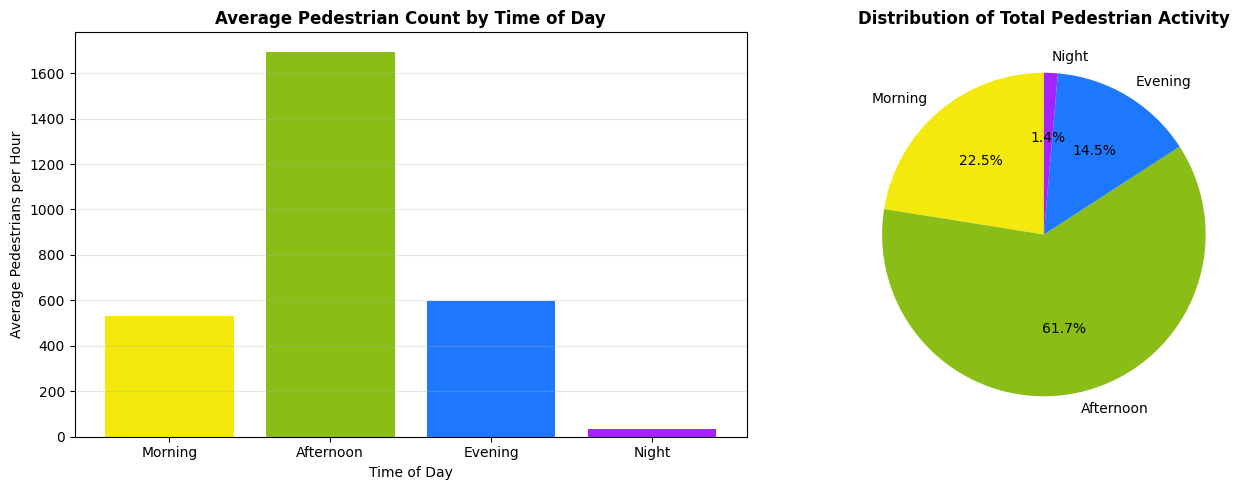


Peak activity period: Afternoon
Average count: 1695 pedestrians/hour


In [31]:
# 3. Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories.
# Use this new column to analyze pedestrian activity patterns throughout the day.

# Categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(categorize_time)

# Analyzing pedestrian patterns by time of day
time_analysis = df.groupby('time_of_day')['Pedestrians'].agg(['sum', 'mean', 'count'])
time_analysis.columns = ['Total', 'Average', 'Hours']
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
time_analysis = time_analysis.reindex(time_order)

print("Pedestrian activity by time of day:")
print(time_analysis)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar graph
ax1.bar(time_analysis.index, time_analysis['Average'], color=['#F3E90D', '#8BBD17', '#1E78FE', '#A423FF'])
ax1.set_title('Average Pedestrian Count by Time of Day', fontsize=12, fontweight='bold')
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Average Pedestrians per Hour')
ax1.grid(axis='y', alpha=0.3)

# Pie chart
ax2.pie(time_analysis['Total'], labels=time_analysis.index, autopct='%1.1f%%',
        colors=['#F3E90D', '#8BBD17', '#1E78FE', '#A423FF'], startangle=90)
ax2.set_title('Distribution of Total Pedestrian Activity', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nPeak activity period: {time_analysis['Average'].idxmax()}")
print(f"Average count: {time_analysis['Average'].max():.0f} pedestrians/hour")